<a href="https://colab.research.google.com/github/jcomita/ML-Assignment-1/blob/main/Comita_MOMA_DataVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

In [24]:
#load MOMA artists database
df_moma_artists = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/main/Artists.csv')

In [25]:
#inspecting data
df_moma_artists.head(15595)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15590,138318,Angelo González,NaN,NaN,male,0,0,NaN,NaN
15591,138319,Roy Battiste,NaN,NaN,male,0,0,NaN,NaN
15592,138320,(Moses) Anthony Figueroa,NaN,NaN,NaN,0,0,NaN,NaN
15593,138321,Sal Becker,NaN,NaN,male,0,0,NaN,NaN


In [26]:
#Calculate missing values inside data frame
missing_values = df_moma_artists.isnull().sum()
missing_percentage = (df_moma_artists.isnull().sum() / len(df_moma_artists)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage' : missing_percentage
})
print(missing_summary)

               Missing Values  Percentage
ConstituentID               0    0.000000
DisplayName                 0    0.000000
ArtistBio                2194   14.068612
Nationality              2488   15.953831
Gender                   3243   20.795127
BeginDate                   0    0.000000
EndDate                     0    0.000000
Wiki QID                12348   79.179224
ULAN                    12664   81.205515


In [27]:
#summarize data
df_moma_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15595 entries, 0 to 15594
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15595 non-null  int64  
 1   DisplayName    15595 non-null  object 
 2   ArtistBio      13401 non-null  object 
 3   Nationality    13107 non-null  object 
 4   Gender         12352 non-null  object 
 5   BeginDate      15595 non-null  int64  
 6   EndDate        15595 non-null  int64  
 7   Wiki QID       3247 non-null   object 
 8   ULAN           2931 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


In [28]:
#check data for any missing values using what Amir did in class to see if it's
#any different, it's not!
missing_values = df_moma_artists.isnull().sum()
print("missing values per column:\n", missing_values)

missing values per column:
 ConstituentID        0
DisplayName          0
ArtistBio         2194
Nationality       2488
Gender            3243
BeginDate            0
EndDate              0
Wiki QID         12348
ULAN             12664
dtype: int64


In [29]:
#Make sure Begin Date is in the correct format across all data
if 'BeginDate' in df_moma_artists.columns:
  df_moma_artists['BeginDate'] = pd.to_datetime(df_moma_artists['BeginDate'],
                                                errors='coerce')
  print("\nData Types After Conversion:\n", df_moma_artists.dtypes)


Data Types After Conversion:
 ConstituentID             int64
DisplayName              object
ArtistBio                object
Nationality              object
Gender                   object
BeginDate        datetime64[ns]
EndDate                   int64
Wiki QID                 object
ULAN                    float64
dtype: object


In [30]:
#Make sure End Date is in the correct format across all data
if 'EndDate' in df_moma_artists.columns:
  df_moma_artists['EndDate'] = pd.to_datetime(df_moma_artists['EndDate'],
  errors='coerce')
  print("\nData Types After Conversion:\n", df_moma_artists.dtypes)


Data Types After Conversion:
 ConstituentID             int64
DisplayName              object
ArtistBio                object
Nationality              object
Gender                   object
BeginDate        datetime64[ns]
EndDate          datetime64[ns]
Wiki QID                 object
ULAN                    float64
dtype: object


In [31]:
#AM STUCK HERE, DO NOT KNOW HOW TO PARSE OUT WHATEVER ELSE I NEED TO UNDERSTAND
#RE MISSING DATA AND MISSING VALUES

In [32]:
#check data for any potential duplicates
duplicates = df_moma_artists[df_moma_artists.duplicated]
print("Duplicates:\n", duplicates)

Duplicates:
 Empty DataFrame
Columns: [ConstituentID, DisplayName, ArtistBio, Nationality, Gender, BeginDate, EndDate, Wiki QID, ULAN]
Index: []


In [33]:
#Examine column Artist Bio
df_moma_artists['ArtistBio']

,ArtistBio
0,"American, 1930–1992"
1,"Spanish, born 1936"
2,"American, born 1941"
3,"American, born 1946"
4,"Danish, born 1941"
...,...
15590,NaN
15591,NaN
15592,NaN
15593,NaN


In [34]:
#Examine column Nationality
df_moma_artists['Nationality']

,Nationality
0,American
1,Spanish
2,American
3,American
4,Danish
...,...
15590,NaN
15591,NaN
15592,NaN
15593,NaN


In [35]:
#Figure out how many different nationalities exist
column_data = df_moma_artists['Nationality']
num_unique_strings = column_data.nunique()
print(f'The number of unique strings in the column is: {num_unique_strings}')

The number of unique strings in the column is: 128


In [36]:
#List the different nationalities by name
column_data = df_moma_artists['Nationality']
unique_strings = column_data.unique()
print(f'The unique strings in the column are: {unique_strings}')

The unique strings in the column are: ['American' 'Spanish' 'Danish' 'Italian' 'French' 'Estonian' 'Mexican'
 'Swedish' nan 'Israeli' 'British' 'Finnish' 'Polish' 'Palestinian'
 'Japanese' 'Guatemalan' 'Colombian' 'Romanian' 'Russian' 'German'
 'Argentine' 'Kuwaiti' 'Belgian' 'Dutch' 'Norwegian' 'Nationality unknown'
 'Chilean' 'Swiss' 'Costa Rican' 'Czech' 'Brazilian' 'Austrian' 'Canadian'
 'Australian' 'Ukrainian' 'Hungarian' 'Haitian' 'Congolese' 'Bolivian'
 'Cuban' 'Slovenian' 'Portuguese' 'Indian' 'Peruvian' 'Icelandic' 'Irish'
 'Croatian' 'Uruguayan' 'Slovak' 'Greek' 'Serbian' 'Chinese' 'Venezuelan'
 'Native American' 'Turkish' 'Panamanian' 'Algerian' 'Ecuadorian'
 'South African' 'Iranian' 'Puerto Rican' 'Korean' 'Canadian Inuit'
 'Paraguayan' 'Luxembourger' 'Nicaraguan' 'Zimbabwean' 'Moroccan'
 'Tanzanian' 'Bulgarian' 'Tunisian' 'Sudanese' 'Taiwanese' 'Ethiopian'
 'Yugoslav' 'Scottish' 'Latvian' 'Azerbaijani' 'Senegalese' 'Thai'
 'New Zealander' 'Lithuanian' 'Pakistani' 'Bahami

In [37]:
#Create a variable called Nationality that includes the list of nationalities
nationality = [unique_strings]
print(nationality)

[array(['American', 'Spanish', 'Danish', 'Italian', 'French', 'Estonian',
       'Mexican', 'Swedish', nan, 'Israeli', 'British', 'Finnish',
       'Polish', 'Palestinian', 'Japanese', 'Guatemalan', 'Colombian',
       'Romanian', 'Russian', 'German', 'Argentine', 'Kuwaiti', 'Belgian',
       'Dutch', 'Norwegian', 'Nationality unknown', 'Chilean', 'Swiss',
       'Costa Rican', 'Czech', 'Brazilian', 'Austrian', 'Canadian',
       'Australian', 'Ukrainian', 'Hungarian', 'Haitian', 'Congolese',
       'Bolivian', 'Cuban', 'Slovenian', 'Portuguese', 'Indian',
       'Peruvian', 'Icelandic', 'Irish', 'Croatian', 'Uruguayan',
       'Slovak', 'Greek', 'Serbian', 'Chinese', 'Venezuelan',
       'Native American', 'Turkish', 'Panamanian', 'Algerian',
       'Ecuadorian', 'South African', 'Iranian', 'Puerto Rican', 'Korean',
       'Canadian Inuit', 'Paraguayan', 'Luxembourger', 'Nicaraguan',
       'Zimbabwean', 'Moroccan', 'Tanzanian', 'Bulgarian', 'Tunisian',
       'Sudanese', 'Taiwanese',

In [38]:
#Import Numpy
import numpy as np

In [39]:
#Import Matplotlib
import matplotlib.pyplot as plt

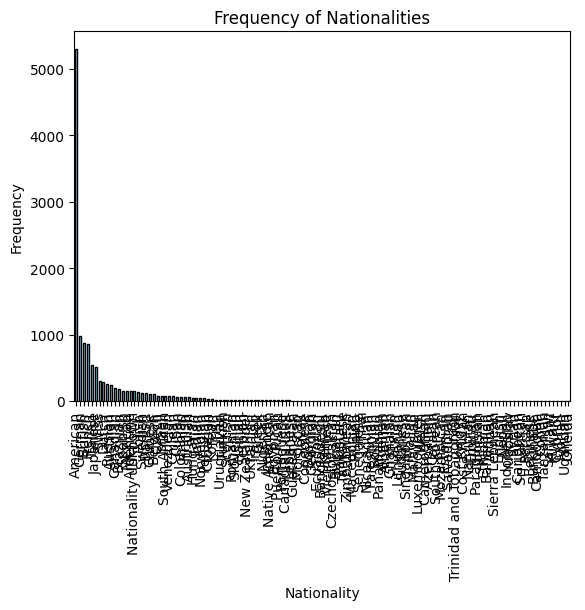

In [40]:
#Plot list as bar chart
value_counts = df_moma_artists['Nationality'].value_counts()
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.show()

In [41]:
#List the frequency of each nationality
nationality_counts = df_moma_artists['Nationality'].value_counts()
nationality_counts_list = nationality_counts.tolist()
print(nationality_counts_list)

[5298, 980, 872, 862, 538, 509, 298, 282, 261, 242, 194, 175, 159, 154, 150, 146, 132, 129, 123, 107, 101, 84, 75, 71, 71, 71, 64, 63, 62, 57, 54, 52, 49, 41, 35, 32, 24, 23, 22, 20, 19, 17, 17, 17, 16, 15, 14, 13, 13, 12, 12, 11, 11, 10, 10, 10, 8, 8, 8, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [42]:
#Include the NAME of the nationality in the frequency list
nationality_and_counts = list(zip(nationality_counts.index.tolist(), nationality_counts.tolist()))
print(nationality_and_counts)

[('American', 5298), ('German', 980), ('British', 872), ('French', 862), ('Italian', 538), ('Japanese', 509), ('Swiss', 298), ('Dutch', 282), ('Russian', 261), ('Austrian', 242), ('Canadian', 194), ('Brazilian', 175), ('Spanish', 159), ('Mexican', 154), ('Argentine', 150), ('Nationality unknown', 146), ('Polish', 132), ('Swedish', 129), ('Danish', 123), ('Chinese', 107), ('Belgian', 101), ('Czech', 84), ('Israeli', 75), ('South African', 71), ('Venezuelan', 71), ('Chilean', 71), ('Cuban', 64), ('Colombian', 63), ('Finnish', 62), ('Australian', 57), ('Hungarian', 54), ('Indian', 52), ('Norwegian', 49), ('Peruvian', 41), ('Croatian', 35), ('Korean', 32), ('Irish', 24), ('Uruguayan', 23), ('Turkish', 22), ('Scottish', 20), ('Romanian', 19), ('Slovenian', 17), ('Haitian', 17), ('Serbian', 17), ('New Zealander', 16), ('Ukrainian', 15), ('Iranian', 14), ('Greek', 13), ('Nigerian', 13), ('Icelandic', 12), ('Native American', 12), ('Egyptian', 11), ('Puerto Rican', 11), ('Portuguese', 10), ('C

In [43]:
#Calculate the same data as above but friendly to chart-building
nationality_and_counts = df_moma_artists['Nationality'].value_counts()

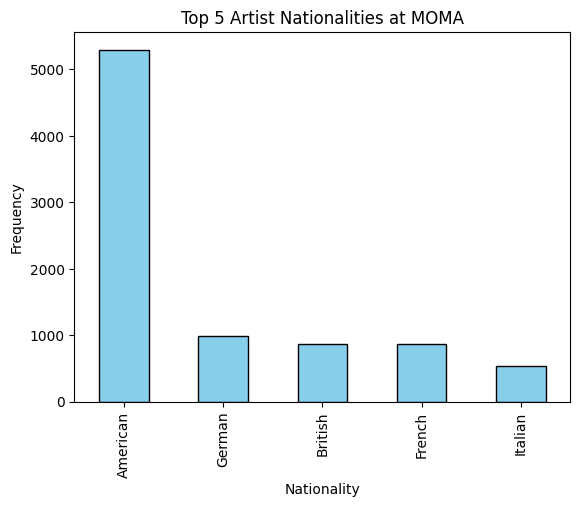

In [44]:
#Build chart of top 5 artist nationalities
top_5 = nationality_and_counts.head(5)
top_5.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 5 Artist Nationalities at MOMA")
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.show()

In [45]:
import seaborn as sns

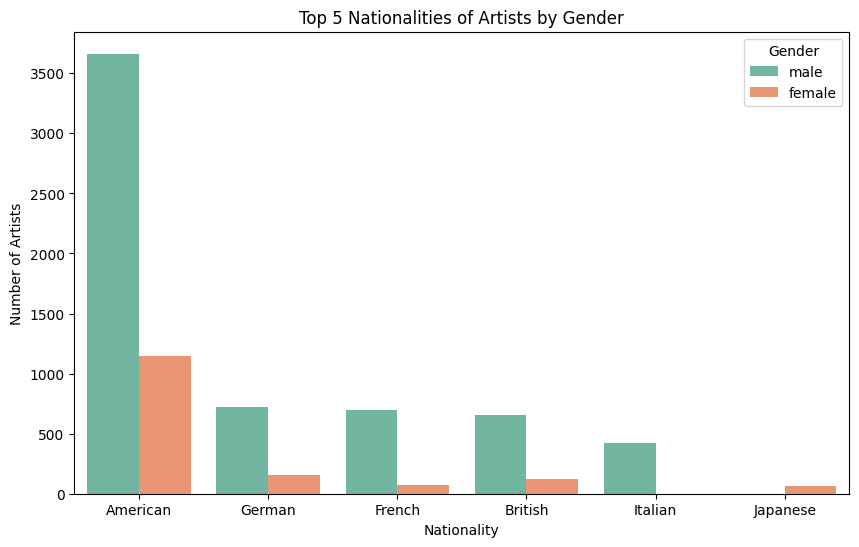

In [46]:
#Calculate top 5 artist nationalities by gender
nationality_gender_counts = df_moma_artists.groupby(['Nationality', 'Gender']).size().reset_index(name='count')
top_5_male = nationality_gender_counts[nationality_gender_counts['Gender'] == 'male'].nlargest(5, 'count')
top_5_female = nationality_gender_counts[nationality_gender_counts['Gender'] == 'female'].nlargest(5, 'count')
top_5 = pd.concat([top_5_male, top_5_female])
plt.figure(figsize=(10, 6))
sns.barplot(x='Nationality', y='count', hue='Gender', data=top_5, palette='Set2')

#Build chart comparing top 5 artist nationalities by gender
plt.title('Top 5 Nationalities of Artists by Gender')
plt.xlabel('Nationality')
plt.ylabel('Number of Artists')
plt.show()

In [47]:
#Load in Artworks database
df_moma_artworks = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/refs/heads/main/Artworks.csv')

In [48]:
#inspecting data
df_moma_artworks.head(156633)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156628,Musique Non Stop and Kraftwerk portraits,Rebecca Allen,33372,"(American, born 1953)",(American),(1953),(0),(female),1986,fourteen digital image files (scans of color s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156629,Musique Non Stop and Kraftwerk portraits,Rebecca Allen,33372,"(American, born 1953)",(American),(1953),(0),(female),1986,fourteen digital image files (scans of color s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156630,Musique Non Stop and Kraftwerk portraits,Rebecca Allen,33372,"(American, born 1953)",(American),(1953),(0),(female),1986,fourteen digital image files (scans of color s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156631,Musique Non Stop and Kraftwerk portraits,Rebecca Allen,33372,"(American, born 1953)",(American),(1953),(0),(female),1986,fourteen digital image files (scans of color s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#Check for missing values
missing_values = df_moma_artworks.isnull().sum()
print("missing values per column:\n", missing_values)

missing values per column:
 Title                     48
Artist                  1261
ConstituentID           1261
ArtistBio               6078
Nationality             1261
BeginDate               1261
EndDate                 1261
Gender                  1261
Date                    2016
Medium                  9254
Dimensions              8644
CreditLine              1524
AccessionNumber            0
Classification             0
Department                 0
DateAcquired            6786
Cataloged                  0
ObjectID                   0
URL                    56619
ImageURL               65969
OnView                155358
Circumference (cm)    156623
Depth (cm)            138818
Diameter (cm)         155164
Height (cm)            28747
Length (cm)           155922
Weight (kg)           156337
Width (cm)             29674
Seat Height (cm)      156633
Duration (sec.)       154681
dtype: int64


In [50]:
#Make sure all dates are in the correct format across data set
if 'BeginDate' in df_moma_artworks.columns:
  df_moma_artworks['BeginDate'] = pd.to_datetime(df_moma_artworks['BeginDate'],
                                                errors='coerce')
if 'EndDate' in df_moma_artworks.columns:
  df_moma_artworks['EndDate'] = pd.to_datetime(df_moma_artworks ['EndDate'],
  errors='coerce')
if 'Date' in df_moma_artworks.columns:
  df_moma_artworks['Date'] = pd.to_datetime(df_moma_artworks ['Date'],
  errors='coerce')
if 'DateAcquired' in df_moma_artworks.columns:
  df_moma_artworks['DateAcquired'] = pd.to_datetime(df_moma_artworks ['DateAcquired'],
  errors='coerce')
  print("\nData Types After Conversion:\n", df_moma_artworks.dtypes)

<ipython-input-50-01423e9e71cc>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_moma_artworks['BeginDate'] = pd.to_datetime(df_moma_artworks['BeginDate'],
<ipython-input-50-01423e9e71cc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_moma_artworks['EndDate'] = pd.to_datetime(df_moma_artworks ['EndDate'],



Data Types After Conversion:
 Title                         object
Artist                        object
ConstituentID                 object
ArtistBio                     object
Nationality                   object
BeginDate             datetime64[ns]
EndDate               datetime64[ns]
Gender                        object
Date                  datetime64[ns]
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired          datetime64[ns]
Cataloged                     object
ObjectID                       int64
URL                           object
ImageURL                      object
OnView                        object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight 

In [51]:
#Examine all numeric columns
numeric_columns = df_moma_artworks.select_dtypes(include=['datetime64', 'float64'
  ]).columns

In [52]:
#Plot each numeric column as histogram with kernal density estimate
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

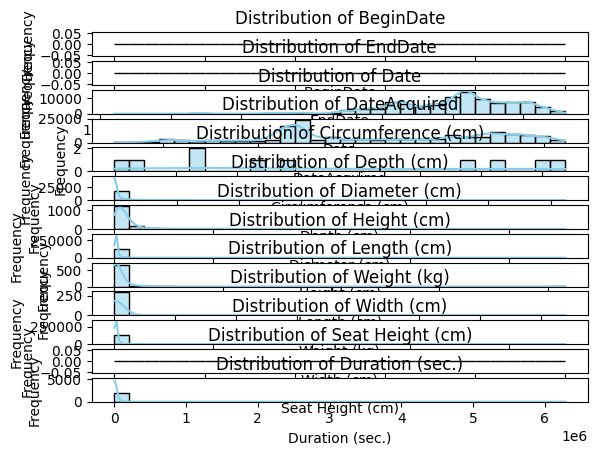

In [53]:
for i, column in enumerate(numeric_columns, 1):
  plt.subplot(len(numeric_columns), 1, i)
  sns.histplot(df_moma_artworks[column], kde=True, color='skyblue', bins=30)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show

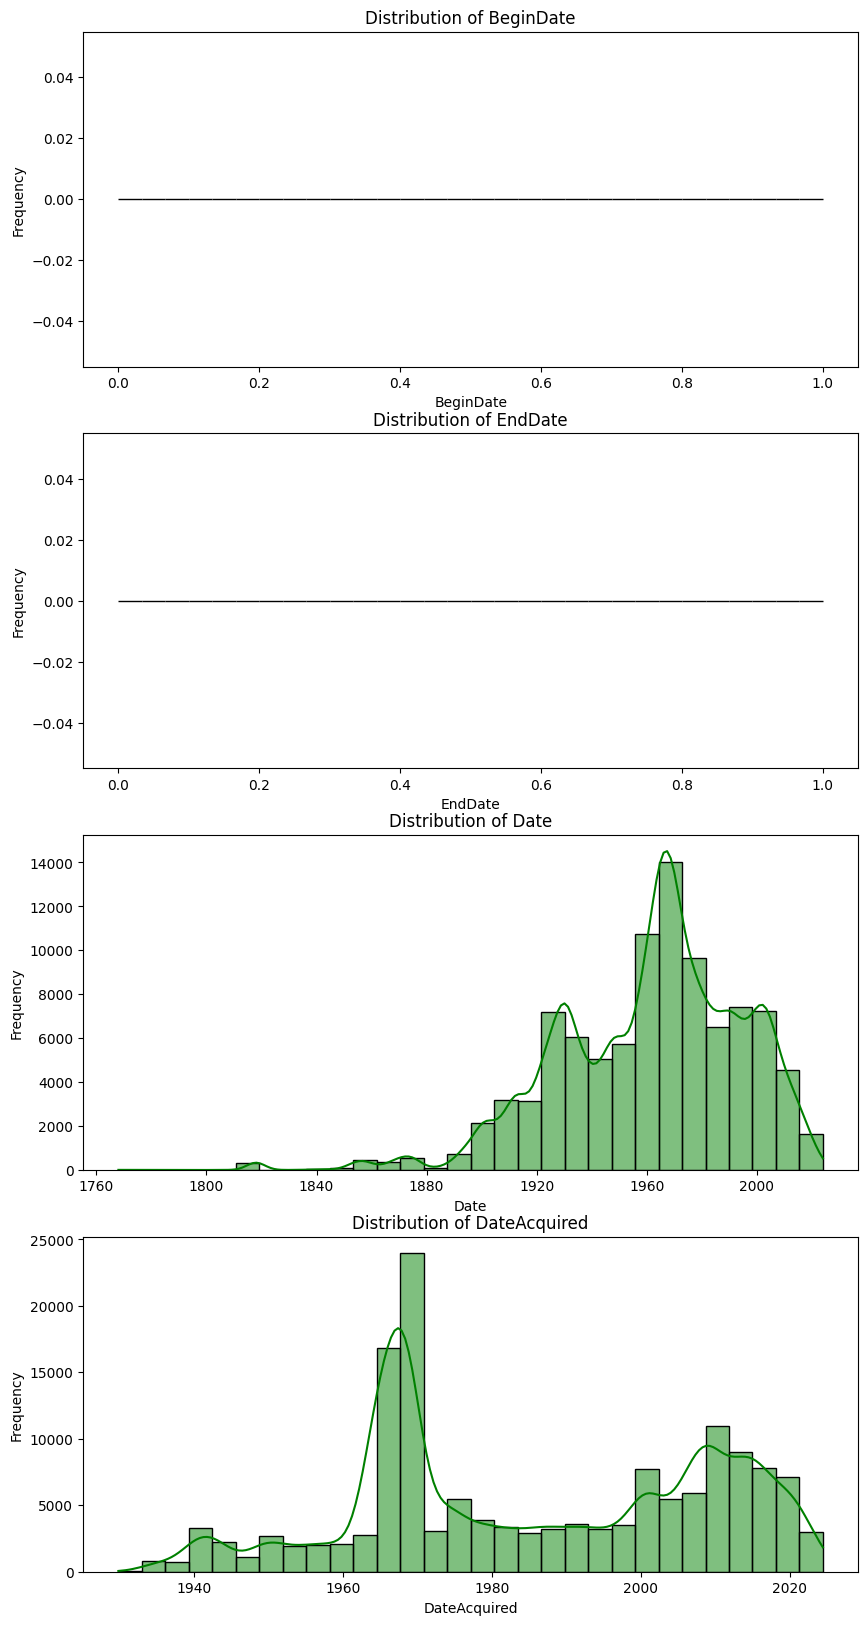

In [54]:
#Start over, do less data
#Examine all datetime
datetime_columns = df_moma_artworks.select_dtypes(include=['datetime64']).columns
plt.figure(figsize=(10, 20))
for i, column in enumerate(datetime_columns, 1):
  plt.subplot(len(datetime_columns), 1, i)
  sns.histplot(df_moma_artworks[column], kde=True, color='green', bins=30)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show

In [55]:
df_moma_artworks['BeginDate'] = df_moma_artworks['BeginDate'].str.replace('(', '', regex=False).str.replace(')', '', regex=False)

AttributeError: Can only use .str accessor with string values!

In [56]:
#Tried other ways besides the above to remove the parenthesis so I could
#plot the begin + end dates, but was unsuccessful. I am assuming the parenthesis
#is the reason they won't plot the same as the artwork date + the date of
#acquisition

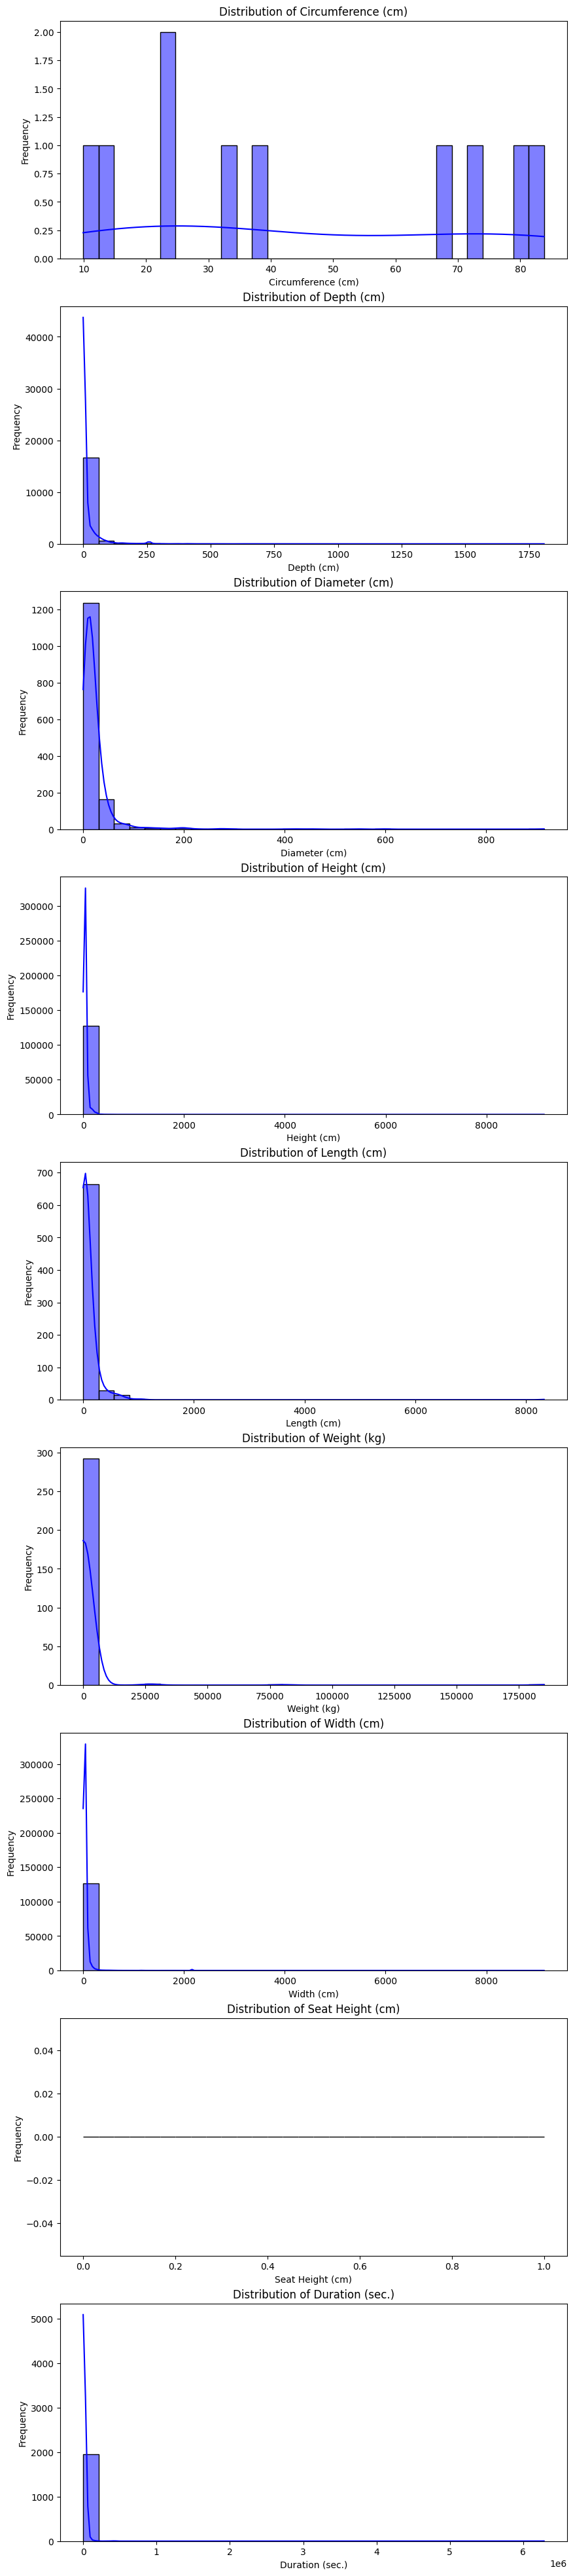

In [57]:
#Examine all float numbers
float_columns = df_moma_artworks.select_dtypes(include=['float64']).columns
plt.figure(figsize=(10, 50))
for i, column in enumerate(float_columns, 1):
  plt.subplot(len(float_columns), 1, i)
  sns.histplot(df_moma_artworks[column], kde=True, color='blue', bins=30)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show

In [60]:
#Plot specific category columns
#NO MATTER WHAT I DO, THIS DOESN'T WORK. I have tried different codes not sure
#what it's not working
categorical_columns = ['Artist', 'Nationality', 'Gender', 'Medium']
plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(x=df_moma_artworks[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7971f61b8f70> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7971f61b81f0> (for post_execute):


KeyboardInterrupt: 

In [62]:
#Couldn't merge Constituent IDs, checking to see how they are labeled
#in each dataset
print(df_moma_artworks.dtypes)
print(df_moma_artists.dtypes)

Title                         object
Artist                        object
ConstituentID                 object
ArtistBio                     object
Nationality                   object
BeginDate             datetime64[ns]
EndDate               datetime64[ns]
Gender                        object
Date                  datetime64[ns]
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired          datetime64[ns]
Cataloged                     object
ObjectID                       int64
URL                           object
ImageURL                      object
OnView                        object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight (kg)                  float64
W

In [70]:
df_moma_artists['ConstituentID'] = df_moma_artists['ConstituentID'].astype(int)

In [72]:
merged_df = pd.merge(df_moma_artists, df_moma_artworks, on='ConstituentID')


ValueError: You are trying to merge on int64 and object columns for key 'ConstituentID'. If you wish to proceed you should use pd.concat